In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ticktack
from ticktack import fitting
import os
from matplotlib.lines import Line2D
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
mpl.style.use('seaborn-colorblind')

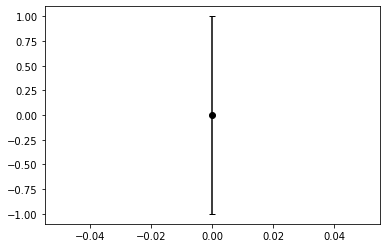

In [2]:
cbm_models = ["Guttler14", "Buntgen18", "Brehm21",]
cbm_names = ["Güttler et al, 2015: 11-box", "Büntgen et al, 2018: 22-box", "Brehm et al, 2021: 22-box"]
colors = mpl.rcParams['axes.prop_cycle'].by_key()['color']
custom_lines = [Line2D([0], [0], color=colors[i], lw=1.5, label=cbm_names[i]) for i in range(len(cbm_models))]
custom_lines.append(plt.errorbar([0], [0], yerr=1, fmt="ok", capsize=3, label="average $\Delta^{14}$C"))
custom_lines.append(Line2D([0], [0], ls="--", color="k", marker="o", lw=1.5, label="average $\Delta^{14}$C NH"))
custom_lines.append(Line2D([0], [0], ls="-", color="k", marker="s", lw=1.5, label="average $\Delta^{14}$C SH"))
events = ["663BCE", "5259BCE", "775AD-late-N", "5410BCE", "7176BCE"]
titles = ["663BCE", "5259BCE", "775CE Sharp-Rise", "5410BCE", "7176BCE"]
intervals = [None, 5, None, 5, 5]

def remove_frame_top(ax):
    ax.get_xaxis().set_visible(False);
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

def remove_frame_bot(ax):
    ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)

def remove_frame(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.xaxis.set_ticks([]); ax.yaxis.set_ticks([])
    ax.xaxis.set_ticklabels([]); ax.yaxis.set_ticklabels([])
    
def plot_CP(ax0, ax1, event=None, title=None, interval=None, markersize=6, markersize2=3, capsize=3, elinewidth=3):
    chain_path = ["chain/{}_{}.npy".format(event, cbm_model) for cbm_model in cbm_models]
    fitting.plot_samples(average_path="data/means/{}.csv".format(event), chains_path=chain_path,
                               cbm_models=cbm_models,
                               hemisphere="north",
                               production_model = "flexible_sinusoid_affine_variant",
                               directory_path="data/{}".format(event),
                               labels=False, axs=[ax0, ax1], interval=interval, markersize=markersize,
                         capsize=capsize, elinewidth=elinewidth)
    ax0.set_title(title, fontsize=14, fontfamily="serif",fontweight="roman")
    
def sp_event(ax0, ax1, title=None, sp_event=None):
    if sp_event == "775AD":
        events = ["775AD-early-N", "775AD-early-S"]
        hemispheres = ["north", "south"]
    else:
        events = ["993AD-N", "993AD-S"]
        hemispheres = ["north", "south"]
    fmts = [["ok", "--k"], ["sk", "-k"]]
    size = 100
    size2 = 30

    for i, event in enumerate(events):
        for j, model in enumerate(models):
            cbm = ticktack.load_presaved_model(model, production_rate_units = 'atoms/cm^2/s')
            sf = fitting.SingleFitter(cbm, cbm_model=model, hemisphere=hemispheres[i])
                
            sf.load_data("data/means/" + event + ".csv")
            if sp_event == "775AD":
                chain = np.load("chain/775AD-early_" + model + ".npy")
            else:
                chain = np.load("chain/993AD_" + model + ".npy")
            sf.compile_production_model(model="flexible_sinusoid_affine_variant")

            idx = np.random.randint(len(chain), size=size)
            for param in chain[idx]:
                ax0.plot(sf.time_data_fine, sf.dc14_fine(params=param), alpha=0.05, color=colors[j])

            for param in chain[idx][:30]:
                ax1.plot(sf.time_data_fine, sf.production(sf.time_data_fine, *param), alpha=0.2, color=colors[j])

        ax0.errorbar(sf.time_data + sf.time_offset, sf.d14c_data, yerr=sf.d14c_data_error, fmt=fmts[i][0], capsize=3,
                     markersize=6.5, elinewidth=3, label="average $\Delta^{14}$C", alpha=1)
        ax0.plot(sf.time_data + sf.time_offset, sf.d14c_data, fmts[i][1], alpha=1)
        file_names = [f for f in os.listdir("data/" + event) if os.path.isfile(os.path.join("data/" + event, f))]
        for file in file_names:
            sf.load_data("data/" + event + '/' + file)
            ax0.errorbar(sf.time_data + sf.time_offset, sf.d14c_data, fmt="o", color="gray", yerr=sf.d14c_data_error, capsize=3,
                         alpha=0.2)

    sf.load_data("data/means/" + event + ".csv")
    ax0.set_title(title, fontsize=14, fontfamily="serif",fontweight="roman")
    ax1.set_ylim(1, 10);
    ax1.set_xlim(sf.start-0.2, sf.end+0.2);

/tmp/ipykernel_10923/2815440430.py:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace=0.15)
INFO[2022-02-07 21:00:42,343]: Unable to initialize backend 'tpu_driver': Not found: Unable to find driver in registry given worker: 
INFO[2022-02-07 21:00:42,343]: Unable to initialize backend 'gpu': Not found: Could not find registered platform with name: "cuda". Available platform names are: Interpreter Host
INFO[2022-02-07 21:00:42,344]: Unable to initialize backend 'tpu': Invalid argument: TpuPlatform is not available.
WARNING[2022-02-07 21:00:42,345]: No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


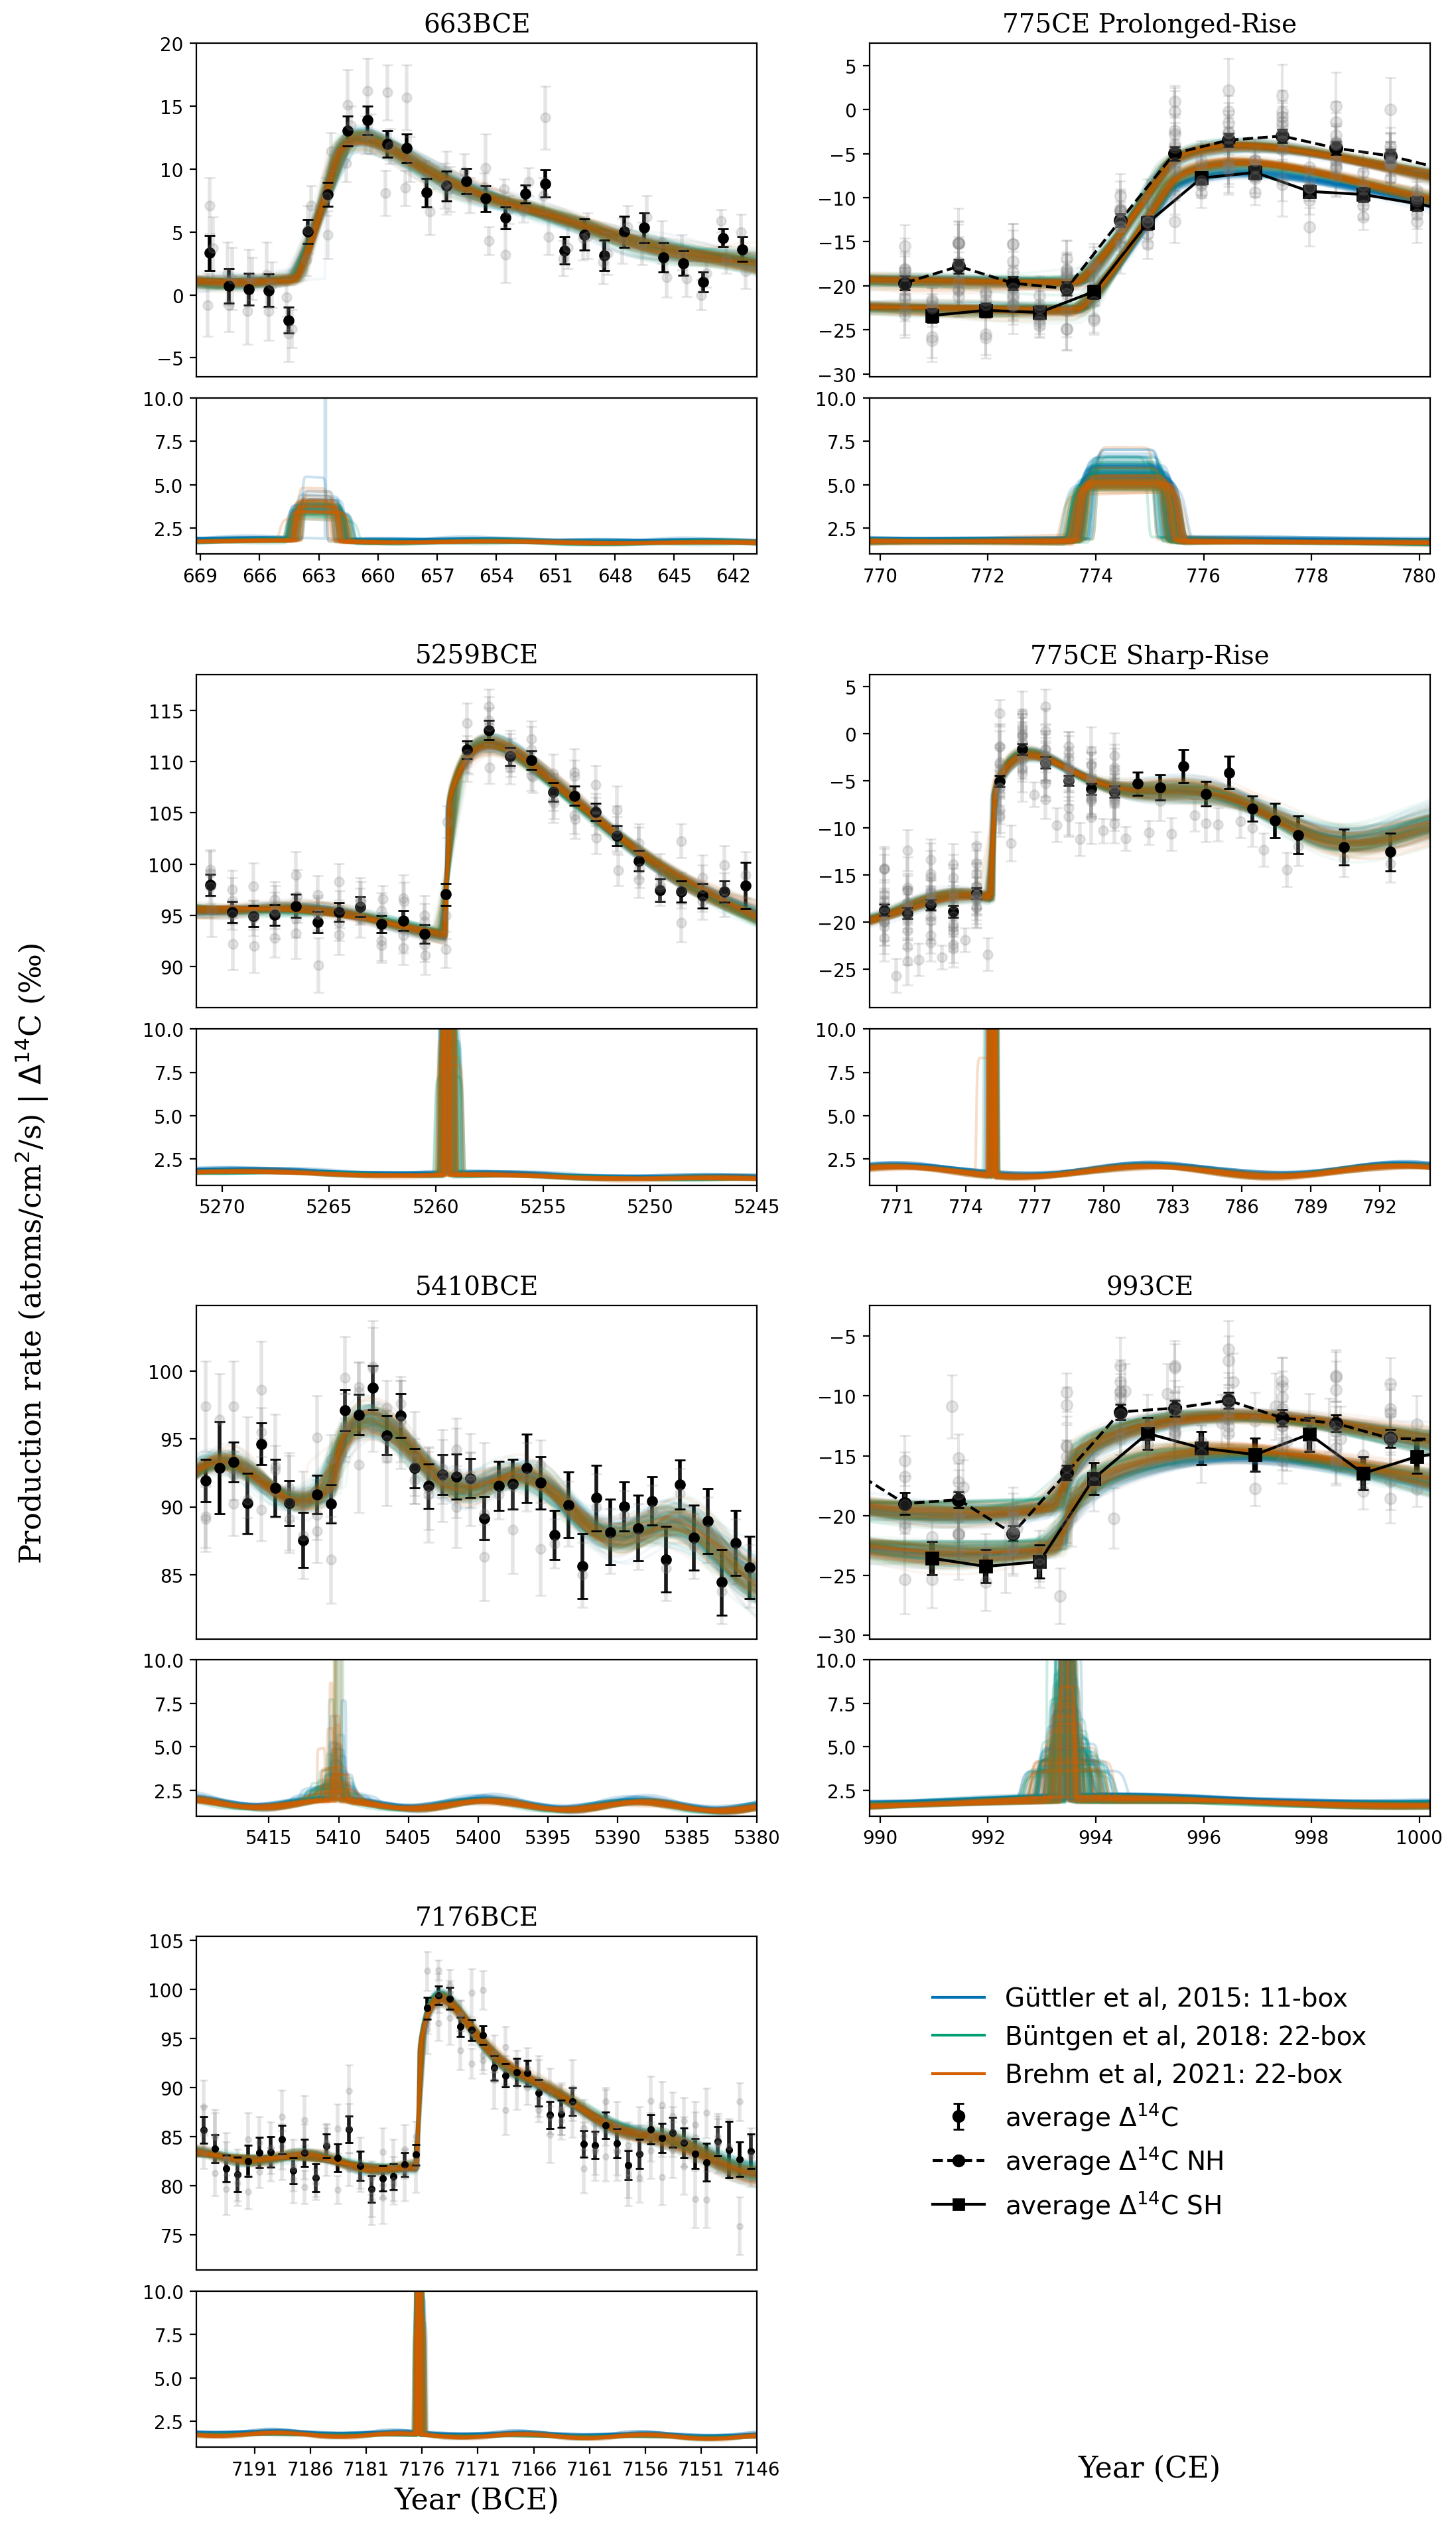

In [3]:
models = ["Guttler14", "Brehm21", "Buntgen18"]
fig = plt.figure(figsize=(12, 24), dpi=200, constrained_layout=True)
fig.subplots_adjust(hspace=0.15)
spec = fig.add_gridspec(ncols=2, nrows=15, height_ratios=[1, 1, 1, 0.5] * 3 + [1, 1, 1])

# left 1
ax0 = fig.add_subplot(spec[0:2, 0])
ax1 = fig.add_subplot(spec[2, 0], sharex=ax0)
ax0.xaxis.set_visible(False);
# remove_frame_top(ax0); remove_frame_bot(ax1);

# right 1
ax2 = fig.add_subplot(spec[0:2, 1])
ax3 = fig.add_subplot(spec[2, 1], sharex=ax2)
ax2.xaxis.set_visible(False);
# remove_frame_top(ax2); remove_frame_bot(ax3);

# invisible block
fig.add_subplot(spec[3, :]).set_visible(False)

# second row
ax4 = fig.add_subplot(spec[4:6, 0])
ax5 = fig.add_subplot(spec[6, 0], sharex=ax4)
ax4.xaxis.set_visible(False);
# ax5.xaxis.set_major_locator(MaxNLocator(integer=True))
# remove_frame_top(ax4); remove_frame_bot(ax5);

ax6 = fig.add_subplot(spec[4:6, 1])
ax7 = fig.add_subplot(spec[6, 1], sharex=ax6)
ax6.xaxis.set_visible(False);
# remove_frame_top(ax6); remove_frame_bot(ax7);

# invisible
fig.add_subplot(spec[7, :]).set_visible(False)

# third row
ax8 = fig.add_subplot(spec[8:10, 0])
ax9 = fig.add_subplot(spec[10, 0], sharex=ax8)
ax8.xaxis.set_visible(False);
# remove_frame_top(ax8); remove_frame_bot(ax9);

ax10 = fig.add_subplot(spec[8:10, 1])
ax11 = fig.add_subplot(spec[10, 1], sharex=ax10)
ax10.xaxis.set_visible(False);
# remove_frame_top(ax10); remove_frame_bot(ax11);

# invisible
fig.add_subplot(spec[11, :]).set_visible(False)

# fourth row
ax12 = fig.add_subplot(spec[12:14, 0])
ax13 = fig.add_subplot(spec[14, 0], sharex=ax12)
ax12.xaxis.set_visible(False);
# remove_frame_top(ax12); remove_frame_bot(ax13);

ax14 = fig.add_subplot(spec[12:14, 1])
ax15 = fig.add_subplot(spec[14, 1], sharex=ax14)
ax14.legend(handles=custom_lines, frameon=False, loc="center", fontsize=14);
ax14.axis("off")
remove_frame(ax15)

# sup
ax13.set_xlabel("Year (BCE)", fontsize=16, fontfamily="serif", fontweight="roman")
ax15.set_xlabel("Year (CE)", fontsize=16, fontfamily="serif", fontweight="roman")
# fig.supxlabel("CE", x=0.75, y=0.1, va="top", fontsize=16, fontfamily="serif", fontweight="roman");
# fig.supxlabel("BCE", x=0.25, y=0.1, va="top", fontsize=16, fontfamily="serif", fontweight="roman");
# fig.suptitle("Samples", x=0.5, y=0.9, va="baseline", fontsize=24, fontfamily="serif", fontweight="roman");
fig.supylabel("Production rate (atoms/cm$^2$/s) | $\Delta^{14}$C (‰)", x=0.01, y=0.5, 
              fontsize=16, fontfamily="serif", fontweight="roman");

# add plots
axs = [(ax0, ax1), (ax4, ax5), (ax6, ax7), (ax8, ax9), (ax12, ax13)]
sp_event(ax2, ax3, sp_event="775AD", title="775CE Prolonged-Rise")
sp_event(ax10, ax11, sp_event="993AD", title="993CE")
for i, ax in enumerate(axs):
    if events[i] == "7176BCE":
        plot_CP(ax[0], ax[1], event=events[i], title=titles[i], interval=intervals[i], markersize=3,
                capsize=2, elinewidth=2)
    else:
        plot_CP(ax[0], ax[1], event=events[i], title=titles[i], interval=intervals[i], markersize=5,
                capsize=3, elinewidth=2)
fig.savefig("fits-samples.pdf", bbox_inches='tight')